# MATH 3375 Examples Notebook #2
# Simple Linear Regression

In simple linear regression, there is one independent variable $x$ and one dependent variable $y$.  Both variables are quantitative. Linear regression assumes there is a **_linear_** relationship between $x$ and $y$, so it is not appropriate to perform regression on variables that do not have a linear relationship. 

Run the cell below and note which plots exhibit a linear relationship. 

(_You do not need to be concerned with how the code works._)

In [ ]:
#Examining plots visually to check for linearity
xvals <- runif(30, 1, 10)
y1 <- -xvals^3 + rnorm(30,0,25)
y2 <- exp(xvals) + rnorm(30,0,350)
y3 <- 2.3 * xvals + rnorm(30,0,1)
y4 <- -2.3 * xvals + rnorm(30,0,1)
y5 <- 2.3 * xvals + rnorm(30,0,4)
y6 <- -2.3 * xvals + rnorm(30,0,4)
y7 <- rnorm(30,0,2)

par(mfrow = c(2, 2))
plot(y1~xvals, main="NON-Linear Relationship")
plot(y2~xvals, main="NON-Linear Relationship")
plot(y3~xvals, main="Strong Positive Linear Relationship")
plot(y4~xvals, main="Strong Negative Linear Relationship")
plot(y5~xvals, main="Weaker Positive Linear Relationship")
plot(y6~xvals, main="Weaker Negative Linear Relationship")
plot(y7~xvals, main="No Relationship Evident")

# Simple Linear Regression Example

We will use the Iris data set again to examine some simple regresison models. For this set of examples, our response variable is Petal Length. (All measurements in the data set are given in _centimeters_.)

In [ ]:
head(iris)   # See the first few rows of Iris data set


## Step 1. Exploratory Data Analysis (EDA)

We always want to have a good sense of how the response variable is distributed and what relationship(s) it may have with other variables. This is why we perform exploratory data analysis before selecting one or more models to try.

### Overall Distribution of Petal Length

The summaries below should look familiar from previous lessons.

In [ ]:
summary(iris$Petal.Length)

In [ ]:
var(iris$Petal.Length)    #Variance
sd(iris$Petal.Length)     #Standard Deviation

In [ ]:
boxplot(iris$Petal.Length, main="Iris Petal Length")

In [ ]:
hist(iris$Petal.Length, main="Distribution of Iris Petal Length")


### Relationship of Petal Length with Other Variables

##### Quantitative Features 

For each quantitative feature, use a scatter plot to examine the relationship visually.

In [ ]:
plot(Petal.Length ~ Petal.Width, data=iris, main="Iris Petal Length by Petal Width", col="blue")

In [ ]:
plot(Petal.Length ~ Sepal.Length, data=iris, main="Iris Petal Length by Sepal Length", col="blue")

In [ ]:
plot(Petal.Length ~ Sepal.Width, data=iris, main="Iris Petal Length by Sepal Width", col="blue")

#### Correlation Coefficients

_Correlation_ measures the strength and direction of a **_linear_** relationship between two quantitative variables. Strength is a magnitude between 0 and 1; direction is positive or negative. The **correlation coefficient** $r$ is a _statistic_ computed from a sample.  The statistic is an estimate of the population parameter $\rho$, which represents the 'true' correlation between the $x$ and $y$ variables.  For both the parameter and the estimate,  $-1 \le \rho, r \le 1$.

The coefficient $r$ is calculated as follows:


<center>
$r = \frac {\sum_{i=1}^{n} {\left(x_i-\overline{x}\right) \left(y_i-\overline{y}\right)} }{\sqrt{\sum_{i=1}^{n}{\left(x_i-\overline{x}\right)^2} \sum_{i=1}^{n}{\left(y_i-\overline{y}\right)^2} }} $
</center>

$r$ is a _statistic_ computed from a sample.  The statistic is an estimate of the population parameter $\rho$, which represents the 'true' correlation between the $x$ and $y$ variables.

Below, we create a table of correlations for all quantitative variables in the Iris data set (columns 1 through 4).

In [ ]:
cor(iris[,1:4])

Notice that:
a) Each variable has correlation 1.0 with itself.

b) For Petal.Length, the quantitative variable with the strongest correlation is Petal.Width.

##### Categorical Features

For each categorical feature, create boxplots by group.

In [ ]:
boxplot(Petal.Length ~ Species, data=iris, main="Iris Petal Length by Species", col="lightblue")

### Step 2. A Simple Linear Model


When x and y appear to have a linear relationship, we represent that 'true' relationship with the following equation:

$y=\beta_0 + \beta_1x$

where $\beta_0$ represents the y-intercept of the line and $\beta_1$ represents the slope.

From a set of sample data, we **_estimate_** this line with an equation like one of the following:

$\widehat{y}=\widehat{\beta}_0 + \widehat{\beta}_1x$

OR

$\widehat{y}=a + bx$

The difference between a given $y$ and the predicted $\widehat{y}$ is called a residual, $y - \widehat{y}$.

The regression equation is formulated using the **_least squares_** method, which minimizes the sum of squared residuals for the given data set.  Thus, the equation **_minimizes_** $\sum_{i=1}^{n}{\left(y_i-\widehat{y}\right)^2}$  (also called SSE, the sum of squared errors).

Based on our exploration, we start with a model that uses petal width as the independent variable (x) to predict petal length, the response variable (y).

In [ ]:
model_iris_01 <- lm(Petal.Length ~ Petal.Width, data = iris)
summary(model_iris_01)

#### Details to Analyze and Interpret in the Model

##### a. Visualize the model: Add the graph of the model (a line) to the scatter plot of the predictor and response variable.

In [ ]:
plot(Petal.Length ~ Petal.Width, data=iris, main="Iris Petal Length by Petal Width", pch = 19, col="lightblue")
abline(model_iris_01, col="blue")

##### b. Determine the Estimated Prediction Equation 

This **_estimated_** prediction equation is a simple linear equation:  
$\widehat{y}=a + bx$
where a is the estimated intercept ($\widehat{\beta}_0$) and b is the estimated slope ($\widehat{\beta}_1$). Notice that the slope is the **_coefficient_** of the predictor in the equation. 

Using the model summary, we see that the the estimated intercept is $a = 1.08356$ and the estimated slope is $b = 2.22994$.

Therefore, the estimated prediction equation is:

$\widehat{y} = 1.08356 + 2.22994x$

OR

$\widehat{Petal.Length} = 1.08356 + 2.22994Petal.Width$

#### Where do these values come from?

Most any statistical software will compute the slope and intercept estimates for you, but for your reference, here is how these two values are computed for a simple linear regression model.

<u>_Simple Linear Regression Line: Slope_</u> 

For a regression line expressed as $\widehat{y}=a + bx$, the slope $b$ of the regression line is calculated as follows: 

<center>
$b = r \frac {s_y}{s_x} $
</center>

where $s_x$ and $s_y$ represent the standard deviation of $x$ and $y$. Notice that $\frac {s_y}{s_x}$ is consistent with our understanding of slope as a ratio of $\frac {\Delta y}{\Delta x}$. This ratio is then scaled by the strength of the linear relationship, $r$.

<u>_Simple Linear Regression Line: y-Intercept_</u>

Every linear regression line contains the point $\left (\overline{x}, \overline{y} \right )$.  We can use this fact along with the computed slope to compute the y-intercept of the regression line as:

<center>
$a = \overline{y} - b \overline{x} $
</center>

##### c. Interpret the Slope and Intercept

<u>_Interpreting the Slope_</u>

The slope of $2.22994$ should be thought of as the **ratio** $\frac{2.22994}{1}$ and interpreted as follows:  

For every additional **1** centimeter of petal width, the predicted petal length increases by about **2.23** centimeters, on average.

<u>_Interpreting the y-Intercept_</u>

The y-intercept of a regression line is often not meaningful, and serves only to position the line at the correct height to model the data.  That is the case here, since the y-intercept of ~1.08 would literally mean that petal with width of zero would be predicted to have length 1.08 centimeters. Clearly, there is no such thing as a petal with width zero.

##### d. Check Assumptions of the Regression Model

We evaluate a linear regression model to determine two things:
* Is a linear model appropriate for these data?
* Do the data meet the conditions for a t-test to determine if the relationship is significant?

In summary, these are the features of the model that need to be checked to answer both of the questions above:
1. **Linearity**: The relationship between the x and y variables is linear
2. **Normality**: The residuals of all data points ($y_i - \widehat{y}_i$ for each predicted y value) are approximately normally distributed
3. **Homoscedasticity**: The variance of residuals remains the same, regardless of the value being predicted
4. **Independence**: All observations in the sample are independent of each other

JMP Statistical Software offers a good review of these [Regression Assumptions](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html) with illustrations.

In addition, the image in **Figure 1** below illustrates conceptually what is expected when assumptions (2) and (3) above are met:  For any given $x$ value, the observed data should be normally distributed around the prediction for that $x$ value, and the spread of that normal distribution should be the same for every $x$.  This will make the **_residuals_** of the predictions normally distributed with equal variance.

Also notice that the predicted $y$ value (outcome) for any given $x$ is:

- a point ON the regression line
- the MEAN of the assumed normally distributed outcomes estimated for that particular $x$



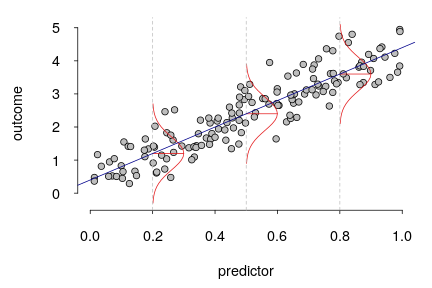

**Figure 1.** Illustration of linear regression assumptions: Linearity, normality, and homoscedasticity (constant variance).<br> <font size = 1>From Vanhove, J. (2018, August 10). _Checking the Assumptions of Your Statistical Model Without Getting Paranoid._ https://doi.org/10.31234/osf.io/zvawb </font>

##### Diagnostic Plots in R
We can test these assumptions by examining diagnostic plots that R generates for linear models.  We do this in the code cell below. Here is a good summary of what we are looking for in each plot: [Explanation of Diagnostic Plots](https://data.library.virginia.edu/diagnostic-plots/)

In [ ]:
plot(model_iris_01)

##### e. Evaluate Significance of Model

The diagnostic plots raise no serious concerns about violated assumptions, so we will proceed with the hypothesis test to determine if there is a 'true' linear relationship between petal length and width (i.e., if the 'true' slope of the line representing this relationship is non-zero.)

Our hypotheses are as follows for a "2-tailed" test:
<center>
$H_0: \beta = 0$
</center>

<center>
$H_a: \beta \ne 0$
</center>

By default, most statistical software assumes that significance tests for regression are 2-sided.

The values we need are given in the "Coefficients" section of the model summary we printed above. The coefficient table is given again here for reference:

|             | Estimate | Std. Error | t value | Pr($>|t|$) |
| ----------- | ------- | ---------- | ------- | -------- |    
| (Intercept) | 1.08356  | 0.07297 |  14.85 |  <2e-16 *** |
| Petal.Width | 2.22994  |  0.05140 |  43.39 |  <2e-16 *** |

The line referring to the estimated slope $\widehat{\beta}$ is the second line (Petal.Width), with estimate $\widehat{\beta} = 2.22994$. 

The test conducted is a t-test, where the t statistic is computed as  $t = \frac{Estimate}{SE}$ where $SE$ refers to the standard error.

For this example, $t = \frac{2.22994}{0.05140} \approx 43.39$

The probability is computed using the $t$ distribution with $n-2$ degrees of freedom. 

(In this case, $df = 148$ because there are $n$ = 150 data points in the data set.)

Because the $t$ statistic is quite large, the $p$-value of the test is extremely small. Therefore, we can reject the null hypothesis that the slope is zero (no relationship) and conclude that the slope $\beta$ of the "true" line characterizing this relationship is non-zero (meaning there is a relationship between petal length and width).

##### f. Evaluate Predictive Value of the Model

The $R^2$ value is the measure of how much variability in the response variable $y$ can be accounted for by the model. This concept can be illustrated geometrically using the [Least Squares Regression Applet](http://www.rossmanchance.com/applets/2021/regshuffle/regshuffle.htm).

In our model output, $R^2 = 0.9266$ indicating that this model accounts for 92.66% of the variation in petal length.

(_NOTE: This is an unusually high $R^2$ value.  Lower values do not mean the model has no use; researchers are often pleased even to have an $R^2$ of 0.1, meaning their model accounts for 10% of the variability in the outcome they are studying._)

##### g. Interpret the Model for Prediction

What is the predicted petal length for an iris with petal width 1.25 centimeters?

$\widehat{y} = 1.08356 + 2.22994(1.25) \approx 3.87$ $cm$

Note that the prediction can also be computed directly from the model in R, using the **_predict_** command:

In [ ]:
new_iris_data <- data.frame(Petal.Width = c(1.25))
predict(model_iris_01, new_iris_data)

This technique is especially powerful when you have an entire set of data to be predicted, instead of just one value.

In [ ]:
new_iris_data <- data.frame(Petal.Width = c(1.25, 0.7, 1.05, 2))
predict(model_iris_01, new_iris_data)


### Suggestion 

Use one or more code cells below to practice the steps above by exploring other possible regression models.